In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Confusion Matrix:
 [[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



[Text(0.375, 0.875, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]\nclass = virginica'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal width (cm) <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]\nclass = virginica'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal length (cm) <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]\nclass = virginica')]

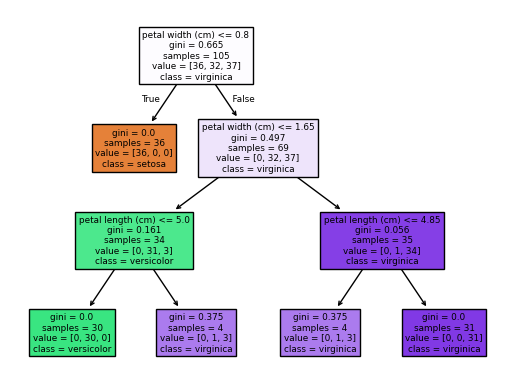

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(max_depth = 3,random_state=1)
dt_model.fit(X_train, y_train)
fi = dt_model.feature_importances_
y_pred_dt = dt_model.predict(X_test)

plot_tree(dt_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)

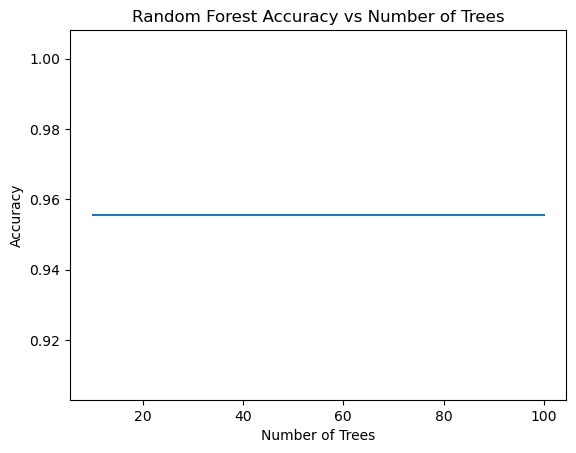

Feature Importances: [0.12104896 0.03099179 0.41291694 0.43504231]


In [12]:
from sklearn.ensemble import RandomForestClassifier
acc = []
for n_trees in [10, 50, 100]:
    rf_model = RandomForestClassifier(n_estimators=n_trees, random_state=1)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    acc.append(accuracy_rf)

plt.plot([10, 50, 100], acc)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.show()

fi = rf_model.feature_importances_
print("Feature Importances:", fi)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
lr = .05
n_estimators = 100
gb_model = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_estimators, random_state=1)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
y_pred_train_gb = gb_model.predict(X_train)
accuracy_train_gb = accuracy_score(y_train, y_pred_train_gb)
print("Gradient Boosting Test Accuracy:", accuracy_gb)
print("Gradient Boosting Train Accuracy:", accuracy_train_gb)

score = gb_model.score(X_test, y_test)
print(score)

Gradient Boosting Test Accuracy: 0.9555555555555556
Gradient Boosting Train Accuracy: 1.0
0.9555555555555556


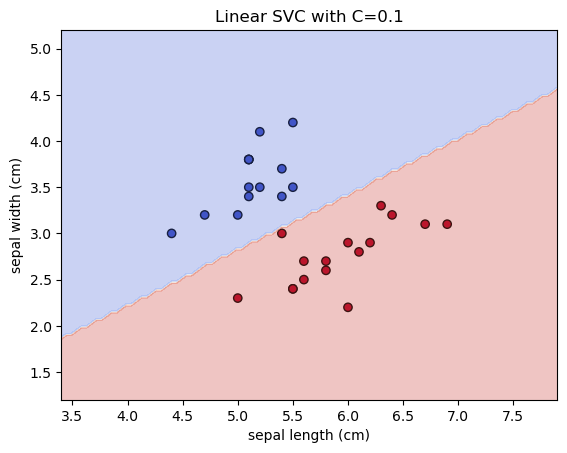

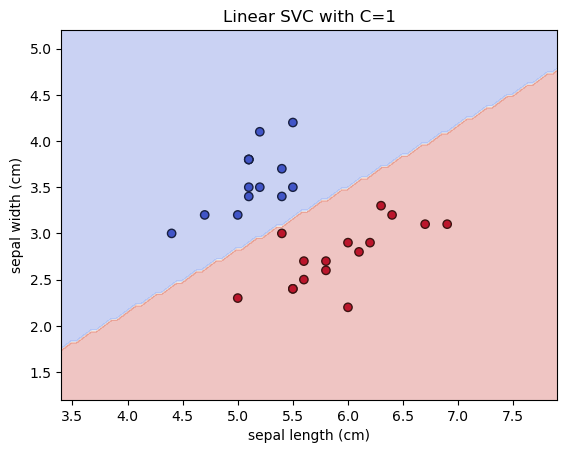

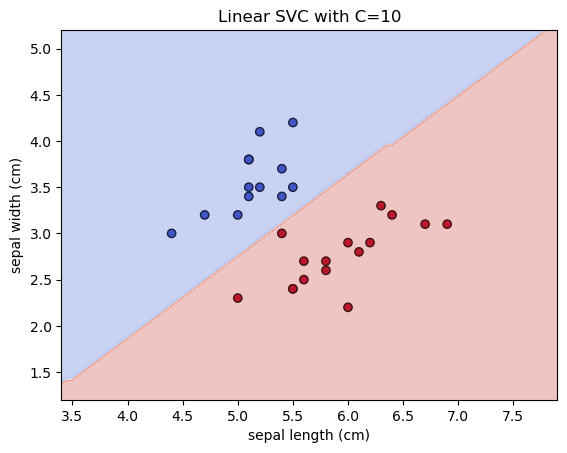

In [19]:
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay

X_binary = X[y < 2, :2]
y_binary = y[y < 2]    
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=1)
for c in [0.1, 1, 10]:
    svc_model = LinearSVC(C=c, random_state=1, max_iter=10000)
    svc_model.fit(X_train, y_train)
    y_pred_svc = svc_model.predict(X_test)
    
    fig, ax = plt.subplots()
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_svc, cmap='coolwarm', edgecolors='k')
    ax.set_title(f'Linear SVC with C={c}')
    
    DecisionBoundaryDisplay.from_estimator(
        svc_model,
        X_test,
        ax=ax,
        response_method="predict",
        cmap='coolwarm',
        alpha=0.3
    )
    
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    plt.show()
    
    




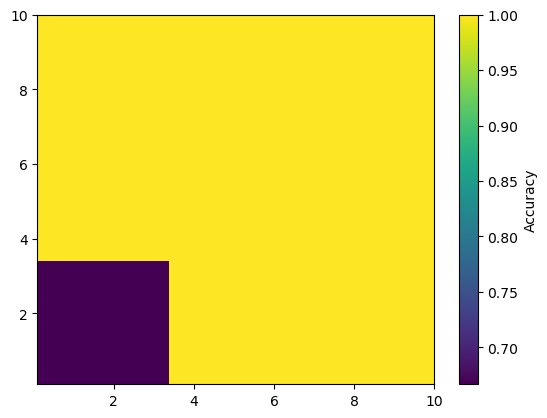

In [22]:
from sklearn.svm import SVC
acc = [[], [], []]
for gamma in [0.1, 1, 10]:
    for c in [0.1, 1, 10]:
        svc_model = SVC(C=c, gamma=gamma, random_state=1, kernel='rbf')
        svc_model.fit(X_train, y_train)
        y_pred_svc = svc_model.predict(X_test)
        
        accuracy_svc = accuracy_score(y_test, y_pred_svc)
        acc[[0.1, 1, 10].index(gamma)].append(accuracy_svc)
        
plt.imshow(acc, extent=[0.1, 10, 0.1, 10], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Accuracy')

In [25]:
import torch
import torch.nn as nn

class TinyModel(nn.Module):
    def __init__(self):
        super(TinyModel, self).__init__()
        self.fc1 = nn.Linear(100, 200)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(200, 10)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x
    
model = TinyModel()
print(model)
for param in model.parameters():
    print(param)



TinyModel(
  (fc1): Linear(in_features=100, out_features=200, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)
Parameter containing:
tensor([[ 0.0697, -0.0285,  0.0275,  ...,  0.0419, -0.0883,  0.0031],
        [ 0.0837,  0.0813, -0.0863,  ..., -0.0691, -0.0893,  0.0057],
        [ 0.0910, -0.0513,  0.0881,  ..., -0.0459,  0.0988, -0.0472],
        ...,
        [ 0.0425, -0.0444,  0.0113,  ..., -0.0263,  0.0544, -0.0736],
        [ 0.0292, -0.0720, -0.0740,  ..., -0.0067, -0.0920,  0.0385],
        [ 0.0230, -0.0011,  0.0521,  ..., -0.0594, -0.0981, -0.0409]],
       requires_grad=True)
Parameter containing:
tensor([-0.0548,  0.0057,  0.0700,  0.0014, -0.0796, -0.0089, -0.0709,  0.0502,
         0.0754, -0.0984, -0.0810,  0.0890, -0.0896, -0.0291,  0.0682, -0.0917,
         0.0455,  0.0451, -0.0562, -0.0029, -0.0645, -0.0664,  0.0613, -0.0510,
        -0.0064,  0.0630, -0.0298, -0.0154,  0.0405, -0.0670, -0.0860, -0.

In [1]:

import torch
from torchvision import transforms, datasets
from torch.utils.tensorboard import SummaryWriter

compose = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=compose)
dataloader_train = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=False)
class_labels = dataset.classes
print(class_labels)

training_set = dataloader_train.dataset
val_set = dataloader_val.dataset
print(len(training_set))
print(len(val_set))
writer = SummaryWriter('runs/fashion_mnist_experiment_1')



100.0%
100.0%
100.0%
100.0%

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
60000
60000
